In [1]:
# MCMurdo Analysis 
# UCSC 2023
# Liam Branch, Michelle Pichardo, Robert Johnson

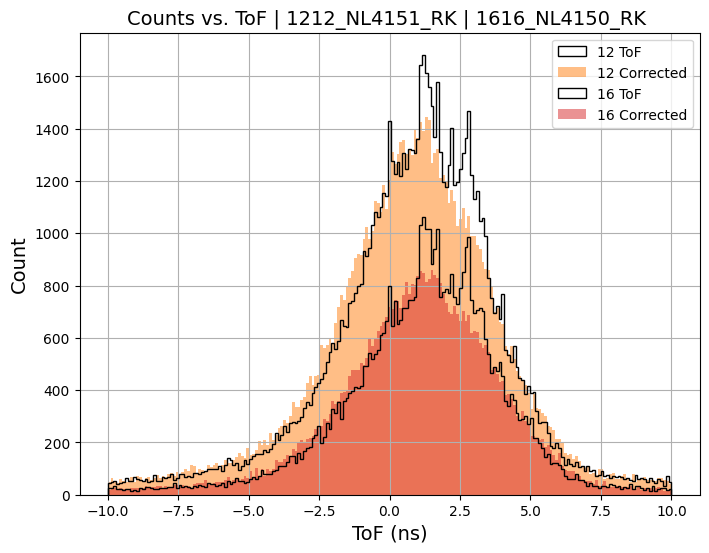

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

""" GLOBALS & CONSTANTS but why/how """
PARAMS = {'A':4317.5, 'B':0.0545, 'n':1.5691}
# Others options
# PARAMS.update({'A':50000, 'n':2.55 })?
PARAMS.update({'n':1.6298})  # but why?

c = 29.9792 # cm/ns

""" 
TOF correction Functions 

V1:  
    tof + A/( 1 + B * sqrt(T1) )  - A/( 1 + B * sqrt(T4) ) + n*(d4-d1)/c
V2:
    tof + n*(d4-d1)/c
"""
def tof_correction(t1, t4, d1, d4, tof):
    return tof + PARAMS['A']/(1+PARAMS['B']*np.sqrt(t1)) \
         - PARAMS['A']/(1+PARAMS['B']*np.sqrt(t4))\
         + PARAMS['n']*(d4-d1) / c
         
def tof_correction_v2(d1,d4,tof):
    return tof + PARAMS['n']*(d4-d1) / c

""" PMT LOC : constants"""
# pmt locations
xPMT4=9.5*np.cos(np.radians(110))*2.54
yPMT4=9.5*np.sin(np.radians(110))*2.54
xPMT1=8.*np.cos(np.radians(-45))*2.54 
# x2PMT1=8.*np.cos(np.radians(-53.72))*2.54 #For test
yPMT1=8.*np.sin(np.radians(-45))*2.54

""" LOAD DATA """
# load data & Select cut type
cut = 0 # 0:default, 1:without cut

# Name Parsing 
direc = 'data/'
prefix = 'Data4ToFCalibration_'
thresh_str = ['1212_NL4151_','1616_NL4150_']
default_pattern_recog = 'RK' # |xL0| < 4 cm
recog_without_position_cut = 'RKToF' # no cut on hit position in the first layer
#   - without cut should increase the numbers and/or quality of the track with T1, T4 trigger
end ='.txt'

CUT_CONDITION = [default_pattern_recog,recog_without_position_cut]
# Load 
df = pd.read_csv(direc+prefix+thresh_str[0]+CUT_CONDITION[cut]+end, sep=' ')
df2 = pd.read_csv(direc+prefix+thresh_str[1]+CUT_CONDITION[cut]+end, sep=' ')
# Used in plot
fileName1 = thresh_str[0]+CUT_CONDITION[cut]
fileName2 = thresh_str[1]+CUT_CONDITION[cut]

""" 
Distance 
    d_ = sqrt( ( x1 - xPMT1 )^2 + ( y1 - yPMT1 )^2 )
    - These are exactly the same??? 
"""
# Threshold of 12 distance from pmt   
dfd1 = np.sqrt(np.power(df['x1']-xPMT1,2)+np.power(df['y1']-yPMT1,2))
dfd4 = np.sqrt(np.power(df['x4']-xPMT4,2)+np.power(df['y4']-yPMT4,2))
# Threshold of 16 (is this missing df2?? --- check his original and ask him!)
#   - I changed it but I need this confirmed
df2d1 = np.sqrt(np.power(df2['x1']-xPMT1,2)+np.power(df2['y1']-yPMT1,2))
df2d4 = np.sqrt(np.power(df2['x4']-xPMT4,2)+np.power(df2['y4']-yPMT4,2))

""" Apply Correction Functions on distance calc 
    - why does T1,T4 with V1 correction change so drastically? 
"""
# Version 1 
df_new_tof = tof_correction(df['T1'], df['T4'], dfd1, dfd4, df['ToF'])
df2_new_tof = tof_correction(df2['T1'], df2['T4'], df2d1, df2d4, df2['ToF'])

# Version 2
df_new_tof = tof_correction_v2(dfd1, dfd4, df['ToF'])
df2_new_tof = tof_correction_v2(df2d1, df2d4, df2['ToF'])

""" PLOT """
# setup
fig0, ax0 = plt.subplots()
fig0.set_size_inches(8,6)
binning = np.linspace(-10,10,200)

# Threshold of 12
ax0.hist(df['ToF'], bins=binning, histtype='step', facecolor='none', edgecolor='k', label='12 ToF')
ax0.hist(df_new_tof, bins=binning, alpha=0.5, label='12 Corrected')

# Threshold of 16
ax0.hist(df2['ToF'], bins=binning, histtype='step', facecolor='none', edgecolor='k', label='16 ToF')
ax0.hist(df2_new_tof, bins=binning, alpha=0.5, label='16 Corrected')

# Labels 
ax0.legend()
ax0.grid()
ax0.set_title(f'Counts vs. ToF | {fileName1} | {fileName2} ', fontsize=14)
ax0.set_ylabel('Count',fontsize=14)
ax0.set_xlabel('ToF (ns)',fontsize=14)
plt.show()

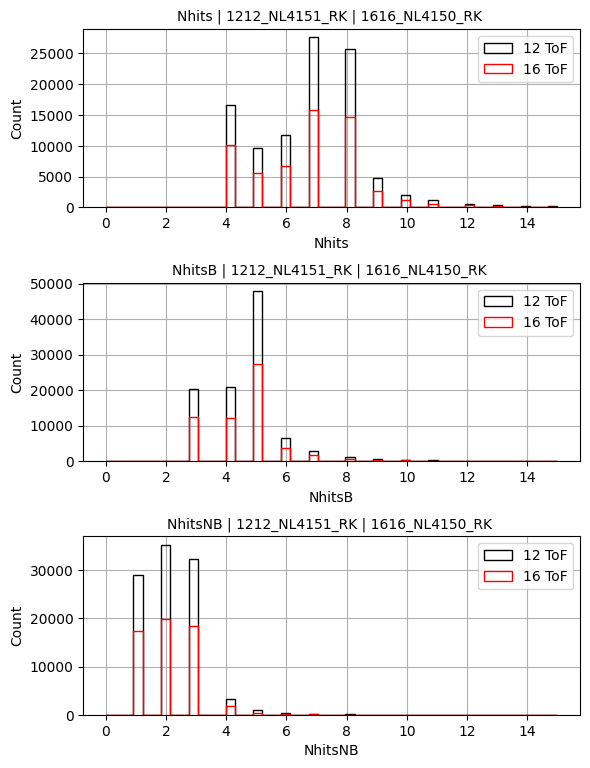

In [61]:
""" PLOT Nhits """
# setup
fig, ax = plt.subplots(3,1)
fig.set_size_inches(6,8)
binning = np.linspace(0,15,50)

ax[0].hist(df['Nhits'], bins=binning, histtype='step', facecolor='none', edgecolor='k', label='12 ToF')
ax[0].hist(df2['Nhits'], bins=binning, histtype='step', facecolor='none', edgecolor='r', label='16 ToF') 
ax[0].legend()
ax[0].grid()
ax[0].set_title(f'Nhits | {fileName1} | {fileName2} ', fontsize=10)
ax[0].set_ylabel('Count',fontsize=10)
ax[0].set_xlabel('Nhits',fontsize=10)

ax[1].hist(df['NhitsB'], bins=binning, histtype='step', facecolor='none', edgecolor='k', label='12 ToF')
ax[1].hist(df2['NhitsB'], bins=binning, histtype='step', facecolor='none', edgecolor='r', label='16 ToF') 
ax[1].legend()
ax[1].grid()
ax[1].set_title(f'NhitsB | {fileName1} | {fileName2} ', fontsize=10)
ax[1].set_ylabel('Count',fontsize=10)
ax[1].set_xlabel('NhitsB',fontsize=10)

ax[2].hist(df['NhitsNB'], bins=binning, histtype='step', facecolor='none', edgecolor='k', label='12 ToF')
ax[2].hist(df2['NhitsNB'], bins=binning, histtype='step', facecolor='none', edgecolor='r', label='16 ToF') 
ax[2].legend()
ax[2].grid()
ax[2].set_title(f'NhitsNB | {fileName1} | {fileName2} ', fontsize=10)
ax[2].set_ylabel('Count',fontsize=10)
ax[2].set_xlabel('NhitsNB',fontsize=10)

fig.tight_layout()
fig.subplots_adjust(top=.93)
plt.show()

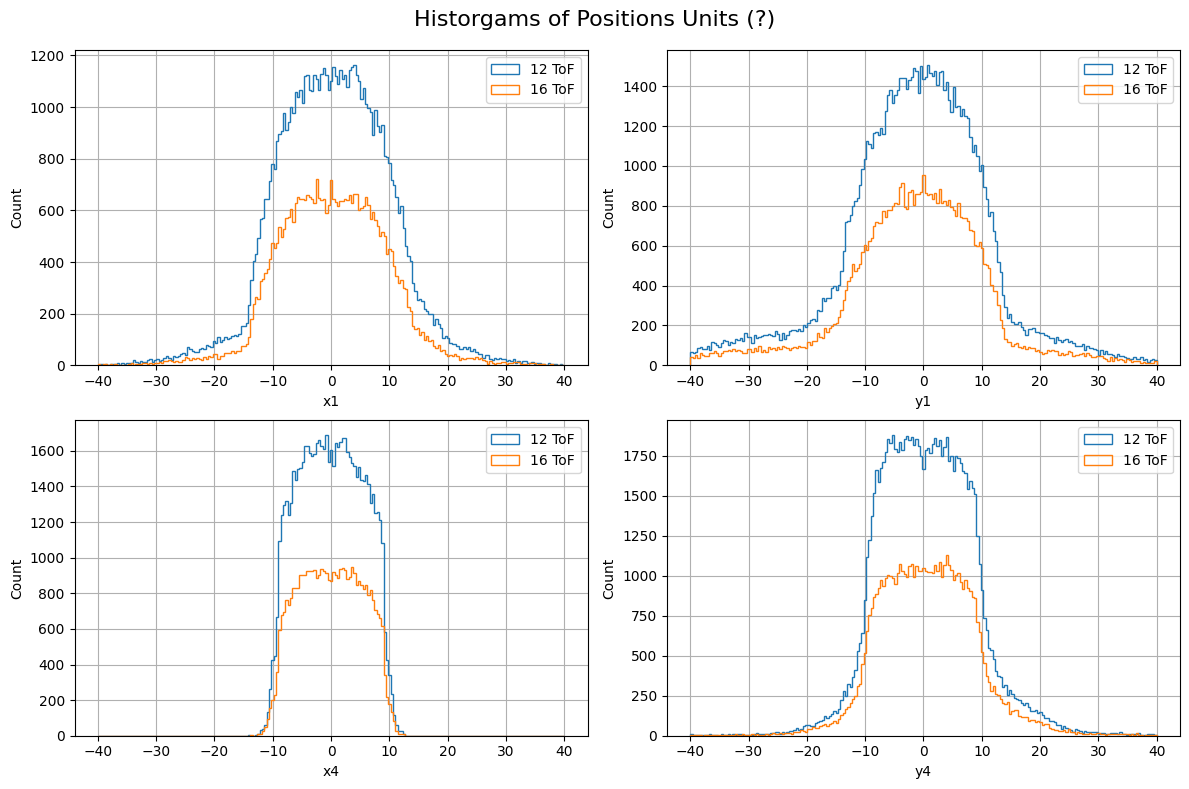

In [5]:
""" PLOT x1y1 x4y4"""
# setup
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,8)
binning = np.linspace(-40,40,200)

# Threshold of 12
ax[0,0].hist(df['x1'], bins=binning, histtype='step', facecolor='none', color = 'C0', label='12 ToF')
ax[0,1].hist(df['y1'], bins=binning, histtype='step', facecolor='none', color = 'C0', label='12 ToF')
ax[1,0].hist(df['x4'], bins=binning, histtype='step', facecolor='none', color = 'C0', label='12 ToF')
ax[1,1].hist(df['y4'], bins=binning, histtype='step', facecolor='none', color = 'C0', label='12 ToF')

# Threshold of 16
ax[0,0].hist(df2['x1'], bins=binning, histtype='step', facecolor='none', color = 'C1', label='16 ToF')
ax[0,1].hist(df2['y1'], bins=binning, histtype='step', facecolor='none', color = 'C1', label='16 ToF')
ax[1,0].hist(df2['x4'], bins=binning, histtype='step', facecolor='none', color = 'C1', label='16 ToF')
ax[1,1].hist(df2['y4'], bins=binning, histtype='step', facecolor='none', color = 'C1', label='16 ToF')

# Labels 
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()

ax[0,0].set_ylabel('Count',fontsize=10)
ax[0,1].set_ylabel('Count',fontsize=10)
ax[1,0].set_ylabel('Count',fontsize=10)
ax[1,1].set_ylabel('Count',fontsize=10)

ax[0,0].set_xlabel('x1',fontsize=10)
ax[0,1].set_xlabel('y1',fontsize=10)
ax[1,0].set_xlabel('x4',fontsize=10)
ax[1,1].set_xlabel('y4',fontsize=10)

fig.tight_layout()
fig.subplots_adjust(top=.93)
fig.suptitle("Historgams of Positions Units (?)", fontsize=16)
plt.show()

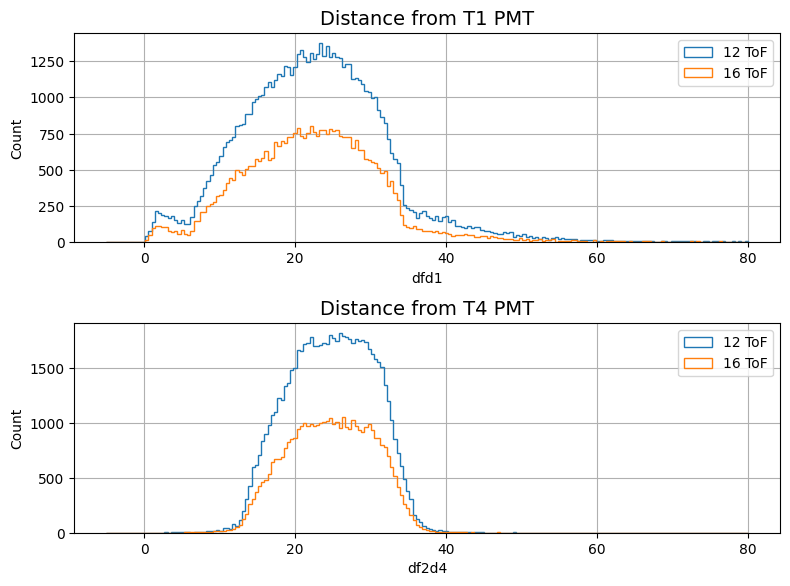

In [29]:
""" PLOT """
# setup
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8,6)
binning = np.linspace(-5,80,200)

# Threshold of 12
ax[0].hist(dfd1, bins=binning, histtype='step', facecolor='none', color = 'C0', label='12 ToF')
ax[0].hist(df2d1, bins=binning, histtype='step', facecolor='none', color = 'C1', label='16 ToF')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Count',fontsize=10)
ax[0].set_xlabel('dfd1',fontsize=10)
ax[0].set_title('Distance from T1 PMT',fontsize=14)


# Threshold of 16
ax[1].hist(dfd4, bins=binning, histtype='step', facecolor='none', color = 'C0', label='12 ToF')
ax[1].hist(df2d4, bins=binning, histtype='step', facecolor='none', color = 'C1', label='16 ToF')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Count',fontsize=10)
ax[1].set_xlabel('df2d4',fontsize=10)
ax[1].set_title('Distance from T4 PMT',fontsize=14)


fig.tight_layout()
fig.subplots_adjust(top=.93)
plt.show()

In [8]:
""" First Glance """

import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress

# Correlation Matrix 
df.corr()


dfd1_corrMatrix = np.corrcoef(df['ToF'], dfd1)
dfd1_lin = linregress(df['ToF'], dfd1)

dfd4_corrMatrix = np.corrcoef(df['ToF'], dfd4)
dfd4_lin = linregress(df['ToF'], dfd4)

df2d1_corrMatrix = np.corrcoef(df2['ToF'], df2d1)
df2d1_lin = linregress(df2['ToF'], df2d1)

df2d4_corrMatrix = np.corrcoef(df2['ToF'], df2d4)
df2d4_lin = linregress(df2['ToF'], df2d4)


print(dfd1_lin)
print(dfd4_lin)
print(df2d1_lin)
print(df2d4_lin)

LinregressResult(slope=1.845320662143281, intercept=297.65888602686664, rvalue=0.2646934478648627, pvalue=0.0, stderr=0.02114668151024763, intercept_stderr=1.4146946320503015)
LinregressResult(slope=1.7988305851259119, intercept=292.5345264212594, rvalue=0.2645395972139611, pvalue=0.0, stderr=0.02062681427169511, intercept_stderr=1.3799159651751862)
LinregressResult(slope=1.917951572770806, intercept=299.03508871442375, rvalue=0.31055431195239963, pvalue=0.0, stderr=0.024282465920330454, intercept_stderr=1.8683678433697979)
LinregressResult(slope=1.8690461118285502, intercept=294.02333217242625, rvalue=0.31032061079188683, pvalue=0.0, stderr=0.023683014299403254, intercept_stderr=1.8222441862473733)


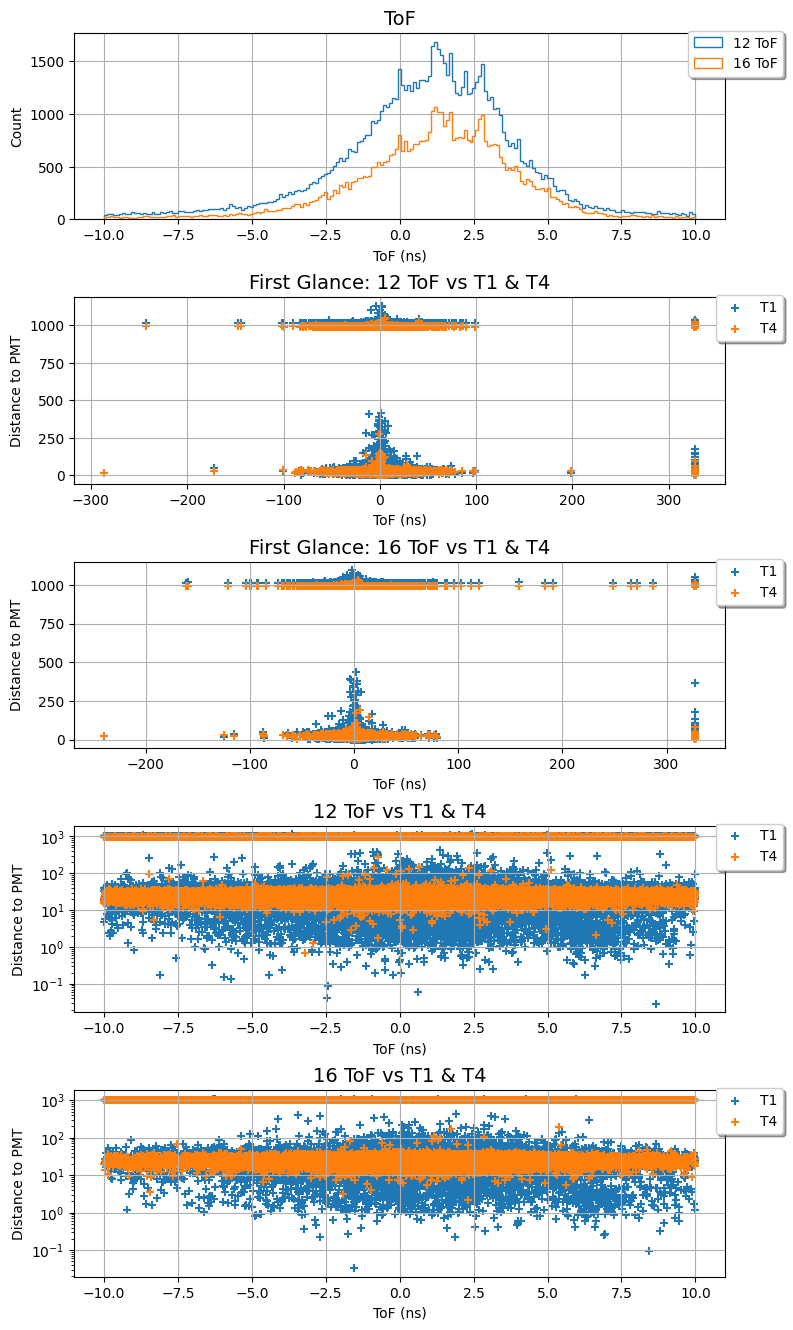

In [16]:
# TOF and dfdN are both series 

tof12 = df['ToF'] # (101073,)
tof16 = df2['ToF'] # (58450,)

# dfd1  (101073,)
# dfd4  (101073,)
# df2d1 (58450,)
# df2d4 (58450,)

# shorten the range of data between -10,10

tof12_10 = tof12[(tof12 >= -10) & (tof12 <= 10)]
tof16_10 = tof16[(tof16 >= -10) & (tof16 <= 10)]

dfd1_10 = dfd1[(tof12 >= -10) & (tof12 <= 10)]
dfd4_10 = dfd4[(tof12 >= -10) & (tof12 <= 10)]

df2d1_10 = df2d1[(tof16 >= -10) & (tof16 <= 10)]
df2d4_10 = df2d4[(tof16 >= -10) & (tof16 <= 10)]

tofbin = np.linspace(-10,10,200)
distPMTbin = np.linspace(-5,80,200)


fig, ax = plt.subplots(5,1)
fig.set_size_inches(8,14)

ax[0].hist(tof12, bins=tofbin, histtype='step', facecolor='none', color = 'C0', label='12 ToF')
ax[0].hist(tof16, bins=tofbin, histtype='step', facecolor='none', color = 'C1', label='16 ToF')
ax[0].legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax[0].grid()
ax[0].set_title('ToF',fontsize=14)
ax[0].set_ylabel('Count',fontsize=10)
ax[0].set_xlabel('ToF (ns)',fontsize=10)

# ax[0,0].hist(dfd1, bins=distPMTbin, histtype='step', facecolor='none', color = 'C0', label='12 dist2PMT')
# ax[0,0].hist(df2d1, bins=distPMTbin, histtype='step', facecolor='none', color = 'C1', label='16 dist2PMT')
# ax[0,0].legend()
# ax[0,0].grid()
# ax[0,0].set_title('T1 to PMT')

# ax[1].hist(dfd4, bins=distPMTbin, histtype='step', facecolor='none', color = 'C0', label='12 dist2PMT')
# ax[1].hist(df2d4, bins=distPMTbin, histtype='step', facecolor='none', color = 'C1', label='16 dist2PMT')
# ax[1].legend()
# ax[1].grid()
# ax[1].set_title('T4 to PMT')

ax[1].scatter(df['ToF'], dfd1, color = 'C0', label='T1', marker= '+')
ax[1].scatter(df['ToF'], dfd4, color = 'C1', label='T4', marker= '+')
# ax[1].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax[1].grid()
ax[1].set_title('First Glance: 12 ToF vs T1 & T4',fontsize=14)
ax[1].set_ylabel('Distance to PMT',fontsize=10)
ax[1].set_xlabel('ToF (ns)',fontsize=10)

ax[2].scatter(df2['ToF'], df2d1, color = 'C0', label='T1', marker= '+')
ax[2].scatter(df2['ToF'], df2d4, color = 'C1', label='T4', marker= '+')
# ax[2].set_yscale('log')
ax[2].legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax[2].grid()
ax[2].set_title('First Glance: 16 ToF vs T1 & T4',fontsize=14)
ax[2].set_ylabel('Distance to PMT',fontsize=10)
ax[2].set_xlabel('ToF (ns)',fontsize=10)

ax[3].scatter(tof12_10, dfd1_10, color = 'C0', label='T1', marker= '+')
ax[3].scatter(tof12_10, dfd4_10, color = 'C1', label='T4', marker= '+')
ax[3].set_yscale('log')
ax[3].legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax[3].grid()
ax[3].set_title('12 ToF vs T1 & T4',fontsize=14)
ax[3].set_ylabel('Distance to PMT',fontsize=10)
ax[3].set_xlabel('ToF (ns)',fontsize=10)

ax[4].scatter(tof16_10, df2d1_10, color = 'C0', label='T1', marker= '+')
ax[4].scatter(tof16_10, df2d4_10, color = 'C1', label='T4', marker= '+')
ax[4].set_yscale('log')
ax[4].legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax[4].grid()
ax[4].set_title('16 ToF vs T1 & T4',fontsize=14)
ax[4].set_ylabel('Distance to PMT',fontsize=10)
ax[4].set_xlabel('ToF (ns)',fontsize=10)


fig.tight_layout()
fig.subplots_adjust(top=.93)
plt.show()

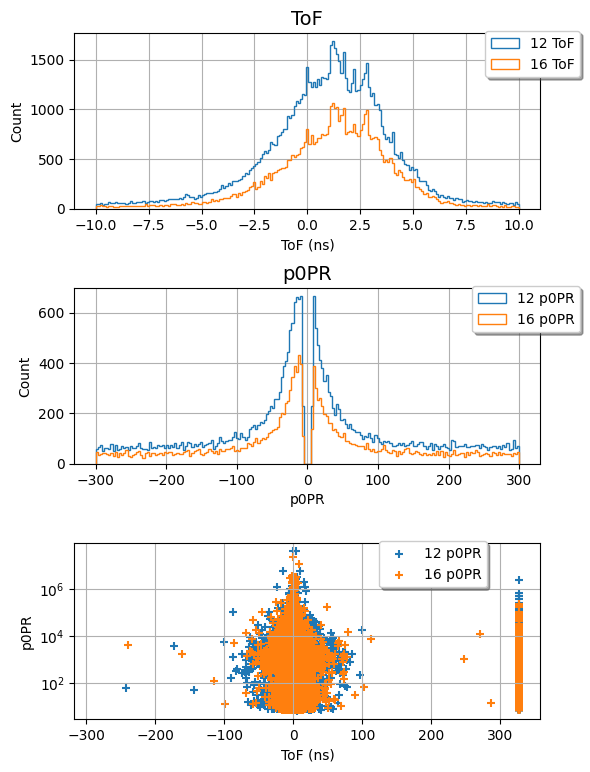

In [60]:
# TOF and dfdN are both series 

tof12 = df['ToF'] # (101073,)
tof16 = df2['ToF'] # (58450,)
p0PR12 = df['p0PR']
p0PR16 = df2['p0PR']


# shorten the range of data between -10,10

tof12_10 = tof12[(tof12 >= -10) & (tof12 <= 10)]
tof16_10 = tof16[(tof16 >= -10) & (tof16 <= 10)]

p0PR12_10 = p0PR12[(tof12 >= -10) & (tof12 <= 10)]
p0PR16_10 = p0PR12[(tof12 >= -10) & (tof12 <= 10)]


tofbin = np.linspace(-10,10,200)
p0PRbin = np.linspace(-300,300,200)


fig, ax = plt.subplots(3,1)
fig.set_size_inches(6,8)

ax[0].hist(tof12, bins=tofbin, histtype='step', facecolor='none', color = 'C0', label='12 ToF')
ax[0].hist(tof16, bins=tofbin, histtype='step', facecolor='none', color = 'C1', label='16 ToF')
ax[0].legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax[0].grid()
ax[0].set_title('ToF',fontsize=14)
ax[0].set_ylabel('Count',fontsize=10)
ax[0].set_xlabel('ToF (ns)',fontsize=10)

ax[1].hist(df['p0PR'], bins=p0PRbin, histtype='step', facecolor='none', color = 'C0', label='12 p0PR')
ax[1].hist(df2['p0PR'], bins=p0PRbin, histtype='step', facecolor='none', color = 'C1', label='16 p0PR')
# ax[1].set_yscale('log')
ax[1].legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax[1].grid()
ax[1].set_title('p0PR',fontsize=14)
ax[1].set_ylabel('Count',fontsize=10)
ax[1].set_xlabel('p0PR',fontsize=10)

ax[2].scatter(tof12, p0PR12, color = 'C0', label='12 p0PR', marker= '+')
ax[2].scatter(tof16, p0PR16, color = 'C1', label='16 p0PR', marker= '+')
ax[2].set_yscale('log')
ax[2].legend(bbox_to_anchor=(.9, 1.05),fancybox=True, shadow=True)
ax[2].grid()
ax[2].set_title('',fontsize=14)
ax[2].set_ylabel('p0PR',fontsize=10)
ax[2].set_xlabel('ToF (ns)',fontsize=10)



fig.tight_layout()
fig.subplots_adjust(top=.93)
plt.show()